In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fName = '/Users/yuntse/data/coherent/SNeNDSens/g4/test/CosmicFlux_g4_0000.h5'

In [3]:
with h5py.File(fName, 'r') as f:
    # Print all top-level groups/datasets
    print(list(f.keys()))
    fS = f['segments']
    fT = f['trajectories']
    fV = f['vertices']
    print(fS.dtype)
    print(fT.dtype)
    print(fV.dtype)
    
    tempS = fS[()]
    tempT = fT[()]
    tempV = fV[()]

['segments', 'trajectories', 'vertices']
{'names': ['event_id', 'vertex_id', 'file_vertex_id', 'segment_id', 'z_end', 'traj_id', 'file_traj_id', 'tran_diff', 'z_start', 'x_end', 'y_end', 'n_electrons', 'pdg_id', 'x_start', 'y_start', 't_start', 't0_start', 't0_end', 't0', 'dx', 'long_diff', 'pixel_plane', 't_end', 'dEdx', 'dE', 't', 'y', 'x', 'z', 'n_photons'], 'formats': ['<u4', '<u8', '<u8', '<u4', '<f4', '<i4', '<u4', '<f4', '<f4', '<f4', '<f4', '<u4', '<i4', '<f4', '<f4', '<f4', '<f8', '<f8', '<f8', '<f4', '<f4', '<i4', '<f4', '<f4', '<f4', '<f4', '<f4', '<f4', '<f4', '<f4'], 'offsets': [0, 8, 16, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 80, 88, 96, 104, 108, 112, 116, 120, 124, 128, 132, 136, 140, 144], 'itemsize': 152}
{'names': ['event_id', 'vertex_id', 'file_vertex_id', 'traj_id', 'file_traj_id', 'parent_id', 'primary', 'E_start', 'pxyz_start', 'xyz_start', 't_start', 'E_end', 'pxyz_end', 'xyz_end', 't_end', 'pdg_id', 'start_process', 'start_subprocess', 'end_process

In [4]:
dS = pd.DataFrame(tempS)
dS

,event_id,vertex_id,file_vertex_id,segment_id,z_end,traj_id,file_traj_id,tran_diff,z_start,x_end,...,long_diff,pixel_plane,t_end,dEdx,dE,t,y,x,z,n_photons
0,8,0,0,0,-61.548096,3,3,0.0,-61.547577,43.899120,...,0.0,0,0.0,28.579384,0.034699,0.0,-46.998043,43.899658,-61.547836,0.0
1,27,0,1,1,-63.500000,0,4,0.0,-60.500000,-36.390289,...,0.0,0,0.0,1.870357,5.846183,0.0,-43.776855,-36.795464,-62.000000,0.0
2,27,0,1,2,-5.108805,0,4,0.0,-0.215802,-52.164787,...,0.0,0,0.0,1.800195,9.184673,0.0,-37.104599,-52.832394,-2.662304,0.0
3,27,0,1,3,-7.336103,0,4,0.0,-5.108805,-51.560547,...,0.0,0,0.0,1.613800,3.746529,0.0,-37.507599,-51.862667,-6.222454,0.0
4,27,0,1,4,-7.754506,0,4,0.0,-7.336103,-51.447517,...,0.0,0,0.0,1.717800,0.749006,0.0,-37.657646,-51.504032,-7.545304,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33321,99857,0,1621,33321,16.145948,4,21490,0.0,16.189775,-4.393023,...,0.0,0,0.0,3.514042,0.653944,0.0,13.319582,-4.413145,16.167862,0.0
33322,99857,0,1621,33322,16.160400,4,21490,0.0,16.145948,-4.422557,...,0.0,0,0.0,10.963266,0.364880,0.0,13.233995,-4.407790,16.153175,0.0
33323,99857,0,1621,33323,18.762287,3,21489,0.0,18.814005,-4.683963,...,0.0,0,0.0,7.712298,0.644018,0.0,14.370745,-4.651864,18.788147,0.0
33324,99857,0,1621,33324,25.611031,2,21488,0.0,25.643400,-5.199065,...,0.0,0,0.0,14.377972,1.013108,0.0,16.809002,-5.168776,25.627216,0.0


In [5]:
dS['dx'].max(), dS['dx'].min()

(27.877931594848633, 0.0)

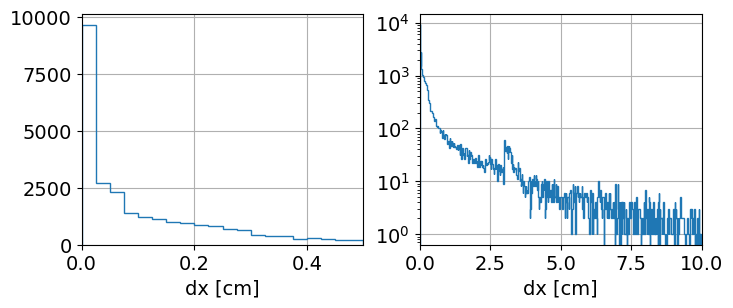

In [6]:
fig, ax = plt.subplots(1, 2, figsize = (8, 3) )  

ax[0].hist(dS['dx'], bins = np.linspace(0, 0.5, 21), histtype = 'step')
ax[0].set_xlabel( r'dx [cm]', fontsize = 14 )
ax[0].tick_params(axis = 'x', labelsize = 14)
ax[0].tick_params(axis = 'y', labelsize = 14)
ax[0].set_xlim( [0, 0.5])

ax[0].grid(":")

ax[1].hist(dS['dx'], bins = np.linspace(0, 10, 501), histtype = 'step', log = True)
ax[1].set_xlabel( r'dx [cm]', fontsize = 14 )
ax[1].tick_params(axis = 'x', labelsize = 14)
ax[1].tick_params(axis = 'y', labelsize = 14)
ax[1].set_xlim( [0, 10])

ax[1].grid(":")

In [7]:
len(dS['dx'])

33326

In [8]:
(dS["dx"] == 0).sum()

151

In [9]:
# unit in cm, half the dimension
# TPC volume
TPCX = 30.
TPCY = 25.
TPCZ = 30.

In [10]:
ActiveVolume = ( ( -TPCX, TPCX ), ( -TPCY, TPCY ), ( -TPCZ, TPCZ ) )
def selInActiveVolume(colX, colY, colZ):
    return dS[colX].between(*ActiveVolume[0]) & dS[colY].between(*ActiveVolume[1]) & dS[colZ].between(*ActiveVolume[2])

In [11]:
dSInTPC = dS[selInActiveVolume('x_start', 'y_start', 'z_start') & selInActiveVolume('x_end', 'y_end', 'z_end')]

In [12]:
dSInTPC

,event_id,vertex_id,file_vertex_id,segment_id,z_end,traj_id,file_traj_id,tran_diff,z_start,x_end,...,long_diff,pixel_plane,t_end,dEdx,dE,t,y,x,z,n_photons
91,195,0,7,91,23.904732,0,48,0.0,30.000000,-25.889360,...,0.0,0,0.0,1.972665,12.736893,0.0,-17.032986,-26.806957,26.952366,0.0
92,195,0,7,92,22.449554,0,48,0.0,23.904732,-25.450296,...,0.0,0,0.0,1.887840,2.911605,0.0,-16.361744,-25.669828,23.177143,0.0
93,195,0,7,93,19.752071,0,48,0.0,22.449554,-24.635002,...,0.0,0,0.0,2.059898,5.889418,0.0,-15.989552,-25.042648,21.100813,0.0
94,195,0,7,94,17.477301,0,48,0.0,19.752071,-23.947256,...,0.0,0,0.0,2.131442,5.139431,0.0,-15.544043,-24.291130,18.614685,0.0
95,195,0,7,95,11.228919,0,48,0.0,17.477301,-22.068150,...,0.0,0,0.0,2.098853,13.893885,0.0,-14.781481,-23.007702,14.353109,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33321,99857,0,1621,33321,16.145948,4,21490,0.0,16.189775,-4.393023,...,0.0,0,0.0,3.514042,0.653944,0.0,13.319582,-4.413145,16.167862,0.0
33322,99857,0,1621,33322,16.160400,4,21490,0.0,16.145948,-4.422557,...,0.0,0,0.0,10.963266,0.364880,0.0,13.233995,-4.407790,16.153175,0.0
33323,99857,0,1621,33323,18.762287,3,21489,0.0,18.814005,-4.683963,...,0.0,0,0.0,7.712298,0.644018,0.0,14.370745,-4.651864,18.788147,0.0
33324,99857,0,1621,33324,25.611031,2,21488,0.0,25.643400,-5.199065,...,0.0,0,0.0,14.377972,1.013108,0.0,16.809002,-5.168776,25.627216,0.0
